# Honey Bee Colony Dynamics Simulations
This notebook includes:
- Original base model
- Pesticide effect
- Seasonal death spikes
- Foraging (food) effects
- Disease outbreak

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

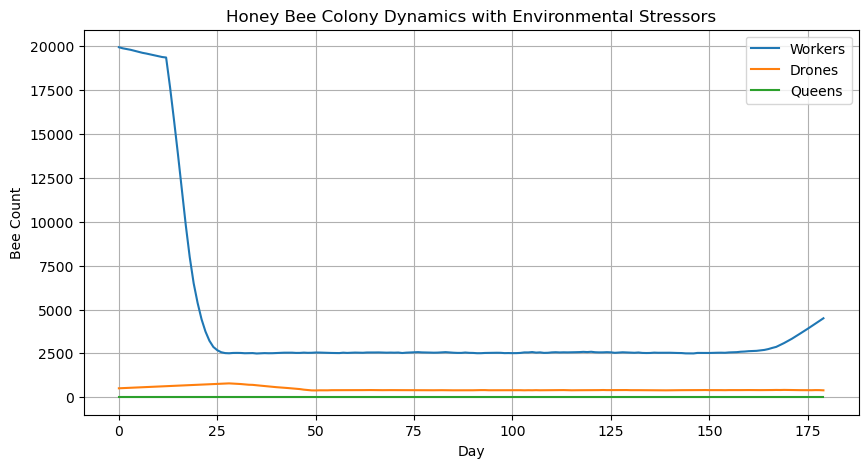

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random

# --- Settings ---
SIMULATION_DAYS = 180
INITIAL_WORKERS = 20000
INITIAL_DRONES = 500
INITIAL_QUEENS = 1

# --- Lifespan Ranges (days) ---
LIFESPANS = {
    'nurse': (14, 21),
    'forager': (8, 12),
    'winter_worker': (120, 180),
    'drone': (30, 50),
    'queen': (730, 1825)
}

SEASON_MAP = {
    'spring': range(0, 60),
    'summer': range(60, 120),
    'fall': range(120, 150)
}

# Environmental toggles
pesticide_effect = True
seasonal_death_spikes = True
food_scarcity = True
disease_outbreak = True

def get_season(day):
    for season, days in SEASON_MAP.items():
        if day in days:
            return season
    return 'winter'

# --- Bee Classes ---
class Bee:
    def __init__(self, role, lifespan):
        self.role = role
        self.age = 0
        self.lifespan = lifespan

    def update(self):
        self.age += 1
        return self.age < self.lifespan

class WorkerBee(Bee):
    def __init__(self, season):
        self.role = 'nurse'
        lifespan = random.randint(*LIFESPANS['nurse'])
        super().__init__(self.role, lifespan)
        self.forager_transition = random.randint(10, 20)
        self.season = season

    def update(self):
        self.age += 1
        if self.role == 'nurse' and self.age > self.forager_transition:
            self.role = 'forager'
            self.lifespan = self.age + random.randint(*LIFESPANS['forager'])
            if food_scarcity:
                self.lifespan -= 2  # reduce forager life under food stress
            if pesticide_effect:
                self.lifespan -= 3  # pesticide reduces forager life
        if seasonal_death_spikes and self.season == 'fall' and self.age > 30:
            return False
        if disease_outbreak and random.random() < 0.01:
            return False
        return self.age < self.lifespan

def generate_worker(season):
    if season == 'winter':
        return Bee('winter_worker', random.randint(*LIFESPANS['winter_worker']))
    return WorkerBee(season)

def generate_drone():
    return Bee('drone', random.randint(*LIFESPANS['drone']))

def generate_queen():
    return Bee('queen', random.randint(*LIFESPANS['queen']))

# --- Simulation ---
workers = [generate_worker('spring') for _ in range(INITIAL_WORKERS)]
drones = [generate_drone() for _ in range(INITIAL_DRONES)]
queens = [generate_queen() for _ in range(INITIAL_QUEENS)]

worker_counts, drone_counts, queen_counts = [], [], []

for day in range(SIMULATION_DAYS):
    season = get_season(day)
    workers = [w for w in workers if w.update()]
    drones = [d for d in drones if d.update()]
    queens = [q for q in queens if q.update()]

    if queens:
        workers.extend([generate_worker(season) for _ in range(150)])
        drones.extend([generate_drone() for _ in range(10)])

    worker_counts.append(len(workers))
    drone_counts.append(len(drones))
    queen_counts.append(len(queens))

# --- Plotting ---
plt.figure(figsize=(10, 5))
plt.plot(worker_counts, label='Workers')
plt.plot(drone_counts, label='Drones')
plt.plot(queen_counts, label='Queens')
plt.title("Honey Bee Colony Dynamics with Environmental Stressors")
plt.xlabel("Day")
plt.ylabel("Bee Count")
plt.legend()
plt.grid(True)
plt.show()


## Original Model

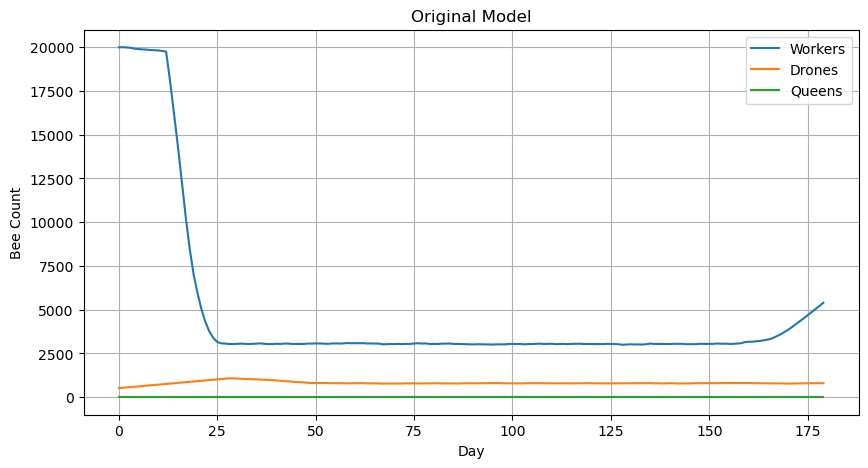

In [ ]:

workers = [generate_worker('spring') for _ in range(INITIAL_WORKERS)]
drones = [generate_drone() for _ in range(INITIAL_DRONES)]
queens = [generate_queen() for _ in range(INITIAL_QUEENS)]

worker_counts, drone_counts, queen_counts = [], [], []

for day in range(SIMULATION_DAYS):
    season = get_season(day)
    workers = [w for w in workers if w.update()]
    drones = [d for d in drones if d.update()]
    queens = [q for q in queens if q.update()]
    if queens:
        workers.extend([generate_worker(season) for _ in range(180)])
        drones.extend([generate_drone() for _ in range(20)])
    worker_counts.append(len(workers))
    drone_counts.append(len(drones))
    queen_counts.append(len(queens))

plt.figure(figsize=(10, 5))
plt.plot(worker_counts, label='Workers')
plt.plot(drone_counts, label='Drones')
plt.plot(queen_counts, label='Queens')
plt.title("Original Model")
plt.xlabel("Day")
plt.ylabel("Bee Count")
plt.legend()
plt.grid(True)
plt.show()


## Pesticide Event

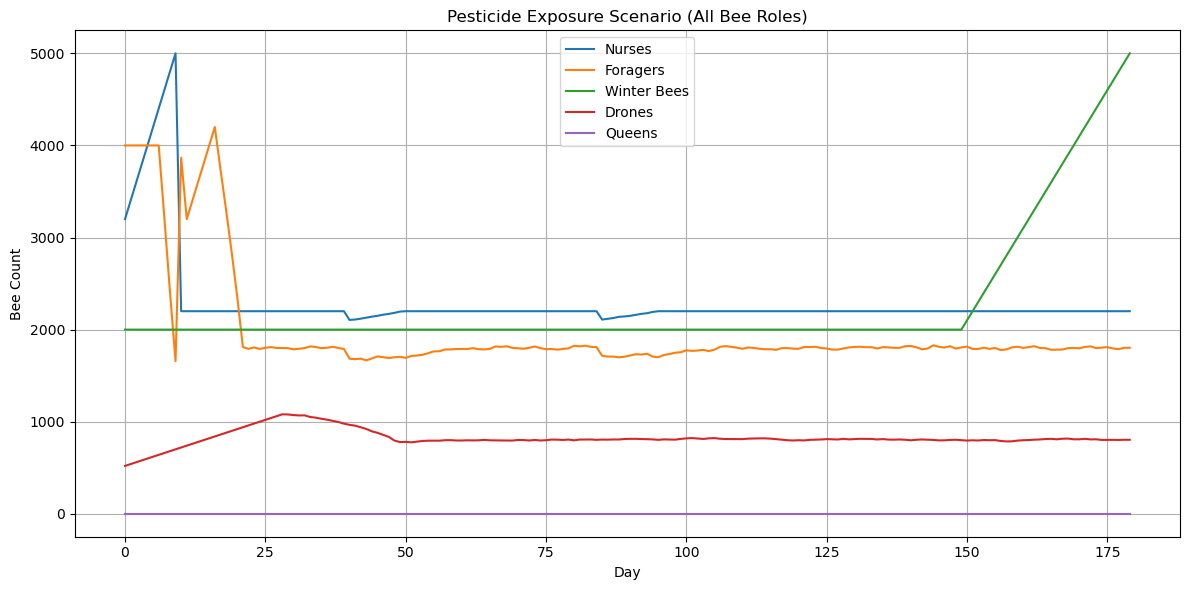

In [ ]:
# --- Pesticide Stress Scenario with All Bee Roles ---

# Initialize bee populations
nurses = [Bee('nurse', random.randint(*LIFESPANS['nurse'])) for _ in range(3000)]
foragers = [Bee('forager', random.randint(*LIFESPANS['forager'])) for _ in range(4000)]
winter_bees = [Bee('winter_worker', random.randint(*LIFESPANS['winter_worker'])) for _ in range(2000)]
drones = [generate_drone() for _ in range(INITIAL_DRONES)]
queens = [generate_queen() for _ in range(INITIAL_QUEENS)]

# Tracking
nurse_counts, forager_counts, winter_counts = [], [], []
drone_counts, queen_counts = [], []

pesticide_days = [40, 85]

for day in range(SIMULATION_DAYS):
    season = get_season(day)
    pesticide_mortality = 0.05 if day in pesticide_days else 0.0

    # Apply pesticide effects on foragers and nurses
    surviving_nurses = []
    graduated = []
    for bee in nurses:
        if random.random() > pesticide_mortality and bee.update():
            if bee.age > 10:
                graduated.append(Bee('forager', random.randint(*LIFESPANS['forager'])))
            else:
                surviving_nurses.append(bee)
    nurses = surviving_nurses
    foragers.extend(graduated)

    foragers = [b for b in foragers if random.random() > pesticide_mortality and b.update()]

    # Winter bees (not heavily affected by pesticides)
    if season == 'winter':
        winter_bees = [b for b in winter_bees if b.update()]

    # Age drones and queens
    drones = [d for d in drones if d.update()]
    queens = [q for q in queens if q.update()]

    # Reproduction
    if queens:
        nurses.extend([Bee('nurse', random.randint(*LIFESPANS['nurse'])) for _ in range(200)])
        drones.extend([generate_drone() for _ in range(20)])
        if season == 'winter':
            winter_bees.extend([Bee('winter_worker', random.randint(*LIFESPANS['winter_worker'])) for _ in range(100)])

    # Track population
    nurse_counts.append(len(nurses))
    forager_counts.append(len(foragers))
    winter_counts.append(len(winter_bees))
    drone_counts.append(len(drones))
    queen_counts.append(len(queens))

# --- Plotting ---
plt.figure(figsize=(12, 6))
plt.plot(nurse_counts, label='Nurses')
plt.plot(forager_counts, label='Foragers')
plt.plot(winter_counts, label='Winter Bees')
plt.plot(drone_counts, label='Drones')
plt.plot(queen_counts, label='Queens')
plt.title("Pesticide Exposure Scenario (All Bee Roles)")
plt.xlabel("Day")
plt.ylabel("Bee Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Seasonal Death Spike

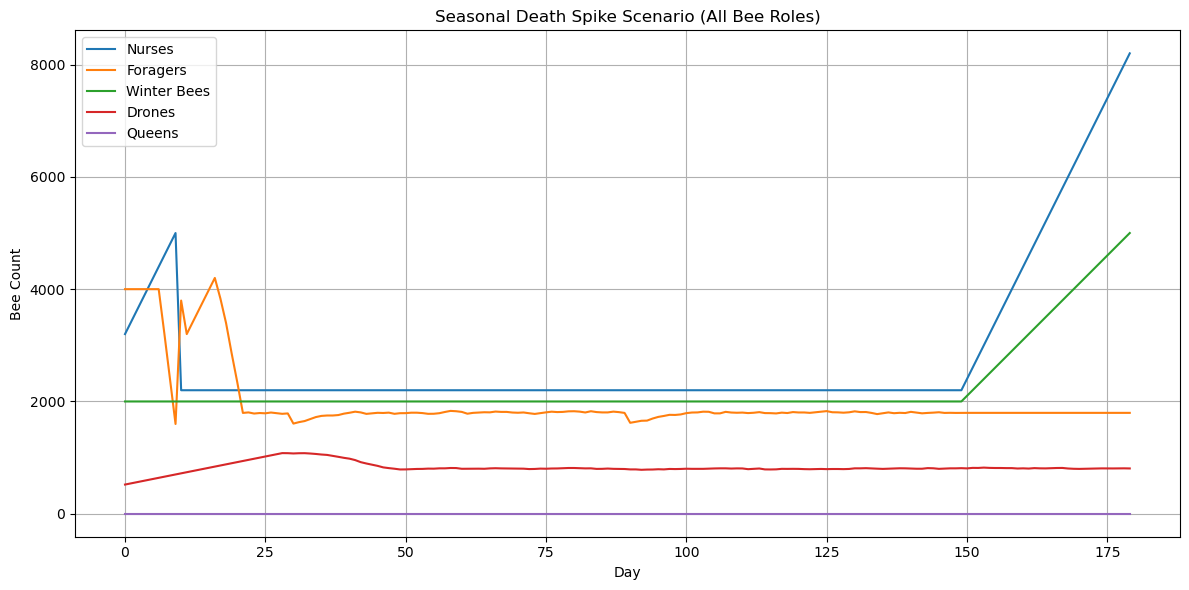

In [ ]:
# --- Seasonal Death Spike Scenario with All Bee Roles ---

# Initialize populations
nurses = [Bee('nurse', random.randint(*LIFESPANS['nurse'])) for _ in range(3000)]
foragers = [Bee('forager', random.randint(*LIFESPANS['forager'])) for _ in range(4000)]
winter_bees = [Bee('winter_worker', random.randint(*LIFESPANS['winter_worker'])) for _ in range(2000)]
drones = [generate_drone() for _ in range(INITIAL_DRONES)]
queens = [generate_queen() for _ in range(INITIAL_QUEENS)]

# Tracking
nurse_counts, forager_counts, winter_counts = [], [], []
drone_counts, queen_counts = [], []

death_spike_days = [30, 90]

# Simulation loop
for day in range(SIMULATION_DAYS):
    season = get_season(day)
    death_spike = 0.10 if day in death_spike_days else 0.0

    # Seasonal transition: use winter bees only in winter
    if season == 'winter':
        # Age winter bees
        winter_bees = [b for b in winter_bees if random.random() > death_spike and b.update()]
    else:
        # Age nurses, promote some to foragers
        graduated = []
        surviving_nurses = []
        for bee in nurses:
            if bee.update():
                if bee.age > 10:
                    graduated.append(Bee('forager', random.randint(*LIFESPANS['forager'])))
                else:
                    surviving_nurses.append(bee)
        nurses = surviving_nurses
        foragers.extend(graduated)

        # Age foragers with potential death spike
        foragers = [b for b in foragers if random.random() > death_spike and b.update()]

    # Age drones and queens
    drones = [d for d in drones if d.update()]
    queens = [q for q in queens if q.update()]

    # Reproduction by queen (adds new nurses)
    if queens:
        nurses.extend([Bee('nurse', random.randint(*LIFESPANS['nurse'])) for _ in range(200)])
        drones.extend([generate_drone() for _ in range(20)])
        if season == 'winter':
            winter_bees.extend([Bee('winter_worker', random.randint(*LIFESPANS['winter_worker'])) for _ in range(100)])

    # Record counts
    nurse_counts.append(len(nurses))
    forager_counts.append(len(foragers))
    winter_counts.append(len(winter_bees))
    drone_counts.append(len(drones))
    queen_counts.append(len(queens))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(nurse_counts, label='Nurses')
plt.plot(forager_counts, label='Foragers')
plt.plot(winter_counts, label='Winter Bees')
plt.plot(drone_counts, label='Drones')
plt.plot(queen_counts, label='Queens')
plt.title("Seasonal Death Spike Scenario (All Bee Roles)")
plt.xlabel("Day")
plt.ylabel("Bee Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Foraging Factor

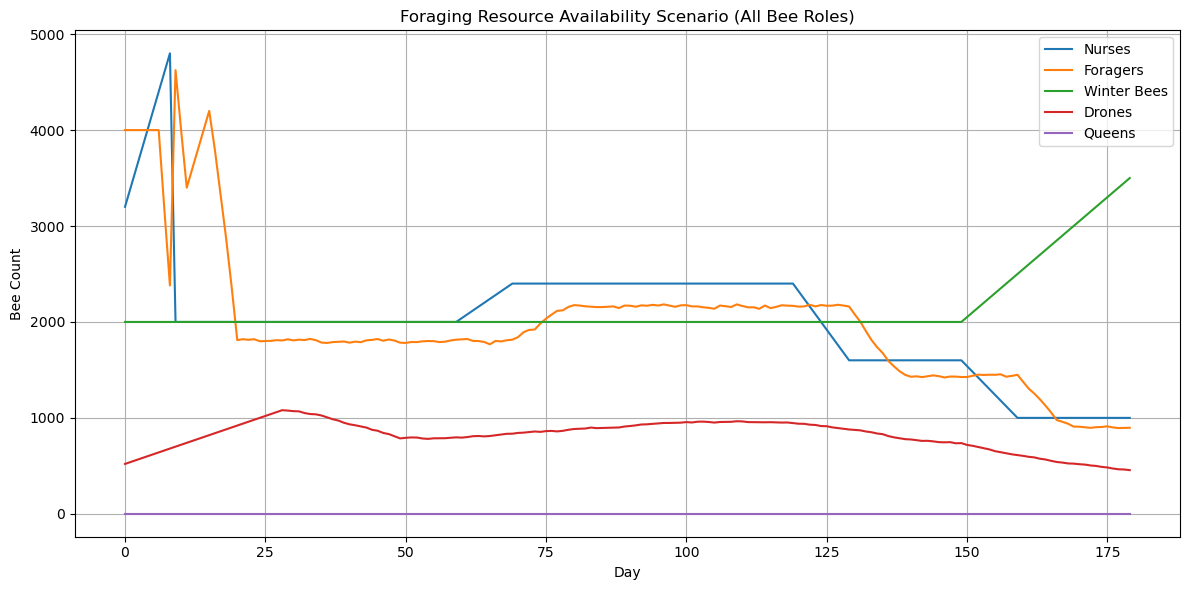

In [ ]:
# --- Foraging Factor Scenario (All Bee Roles) ---

# Food multipliers by season
food_levels = {'spring': 1.0, 'summer': 1.2, 'fall': 0.8, 'winter': 0.5}

# Initialize bee populations
nurses = [Bee('nurse', random.randint(*LIFESPANS['nurse'])) for _ in range(3000)]
foragers = [Bee('forager', random.randint(*LIFESPANS['forager'])) for _ in range(4000)]
winter_bees = [Bee('winter_worker', random.randint(*LIFESPANS['winter_worker'])) for _ in range(2000)]
drones = [generate_drone() for _ in range(INITIAL_DRONES)]
queens = [generate_queen() for _ in range(INITIAL_QUEENS)]

# Tracking
nurse_counts, forager_counts, winter_counts = [], [], []
drone_counts, queen_counts = [], []

for day in range(SIMULATION_DAYS):
    season = get_season(day)
    food_multiplier = food_levels.get(season, 1.0)

    # Age and filter bees
    surviving_nurses = []
    graduating = []
    for bee in nurses:
        if bee.update():
            if bee.age >= 10:
                graduating.append(Bee('forager', random.randint(*LIFESPANS['forager'])))
            else:
                surviving_nurses.append(bee)
    nurses = surviving_nurses
    foragers.extend(graduating)
    foragers = [b for b in foragers if b.update()]

    if season == 'winter':
        winter_bees = [b for b in winter_bees if b.update()]

    drones = [d for d in drones if d.update()]
    queens = [q for q in queens if q.update()]

    # Reproduction and replenishment
    if queens:
        nurses.extend([Bee('nurse', random.randint(*LIFESPANS['nurse'])) for _ in range(int(200 * food_multiplier))])
        drones.extend([generate_drone() for _ in range(int(20 * food_multiplier))])
        if season == 'winter':
            winter_bees.extend([Bee('winter_worker', random.randint(*LIFESPANS['winter_worker'])) for _ in range(int(100 * food_multiplier))])

    # Track population
    nurse_counts.append(len(nurses))
    forager_counts.append(len(foragers))
    winter_counts.append(len(winter_bees))
    drone_counts.append(len(drones))
    queen_counts.append(len(queens))

# --- Plotting ---
plt.figure(figsize=(12, 6))
plt.plot(nurse_counts, label='Nurses')
plt.plot(forager_counts, label='Foragers')
plt.plot(winter_counts, label='Winter Bees')
plt.plot(drone_counts, label='Drones')
plt.plot(queen_counts, label='Queens')
plt.title("Foraging Resource Availability Scenario (All Bee Roles)")
plt.xlabel("Day")
plt.ylabel("Bee Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Disease Outbreak


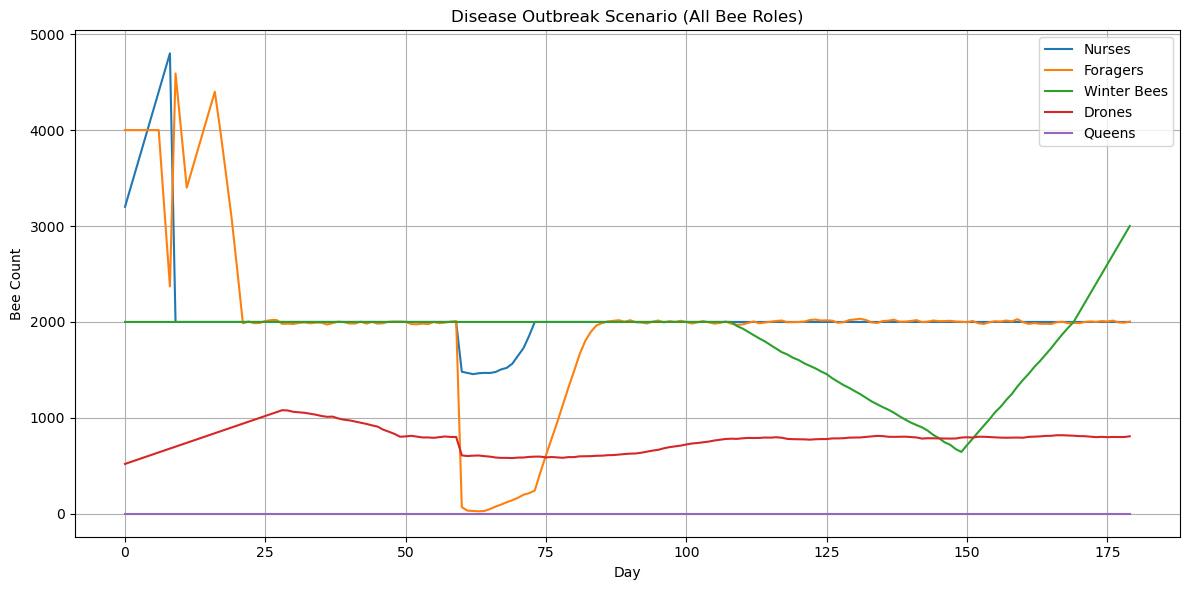

In [22]:
# --- DiseaseBee Class ---
class DiseaseBee(Bee):
    def __init__(self, role, lifespan):
        super().__init__(role, lifespan)
        self.infected = False

    def update(self, disease_effect=0):
        self.age += 1
        effective_lifespan = self.lifespan - disease_effect if self.infected else self.lifespan
        return self.age < max(effective_lifespan, 1)

# --- Bee Generation Functions ---
def generate_disease_nurse():
    return DiseaseBee('nurse', random.randint(*LIFESPANS['nurse']))

def generate_disease_forager():
    return DiseaseBee('forager', random.randint(*LIFESPANS['forager']))

def generate_disease_winter():
    return DiseaseBee('winter_worker', random.randint(*LIFESPANS['winter_worker']))

def generate_disease_drone():
    return DiseaseBee('drone', random.randint(*LIFESPANS['drone']))

def generate_disease_queen():
    return DiseaseBee('queen', random.randint(*LIFESPANS['queen']))

# --- Initialization ---
disease_days = [60, 61, 62, 63, 64]
disease_effect = 10

nurses = [generate_disease_nurse() for _ in range(3000)]
foragers = [generate_disease_forager() for _ in range(4000)]
winter_bees = [generate_disease_winter() for _ in range(2000)]
drones = [generate_disease_drone() for _ in range(INITIAL_DRONES)]
queens = [generate_disease_queen() for _ in range(INITIAL_QUEENS)]

# Tracking
nurse_counts, forager_counts, winter_counts = [], [], []
drone_counts, queen_counts = [], []

# --- Simulation ---
for day in range(SIMULATION_DAYS):
    season = get_season(day)
    disease_active = day in disease_days

    # Update bees with disease effects
    for group in [nurses, foragers, winter_bees, drones, queens]:
        for bee in group:
            if disease_active:
                bee.infected = True

    nurses = [b for b in nurses if b.update(disease_effect)]
    foragers = [b for b in foragers if b.update(disease_effect)]
    winter_bees = [b for b in winter_bees if b.update(disease_effect)]
    drones = [b for b in drones if b.update(disease_effect)]
    queens = [b for b in queens if b.update(disease_effect)]

    # Nurse to Forager Transition
    graduated = [b for b in nurses if b.age >= 10]
    nurses = [b for b in nurses if b.age < 10]
    foragers.extend([DiseaseBee('forager', random.randint(*LIFESPANS['forager'])) for _ in graduated])

    # Reproduction
    if queens:
        nurses.extend([generate_disease_nurse() for _ in range(200)])
        drones.extend([generate_disease_drone() for _ in range(20)])
        if season == 'winter':
            winter_bees.extend([generate_disease_winter() for _ in range(100)])

    # Logging
    nurse_counts.append(len(nurses))
    forager_counts.append(len(foragers))
    winter_counts.append(len(winter_bees))
    drone_counts.append(len(drones))
    queen_counts.append(len(queens))

# --- Plotting ---
plt.figure(figsize=(12, 6))
plt.plot(nurse_counts, label='Nurses')
plt.plot(forager_counts, label='Foragers')
plt.plot(winter_counts, label='Winter Bees')
plt.plot(drone_counts, label='Drones')
plt.plot(queen_counts, label='Queens')
plt.title("Disease Outbreak Scenario (All Bee Roles)")
plt.xlabel("Day")
plt.ylabel("Bee Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Baseline Scenario

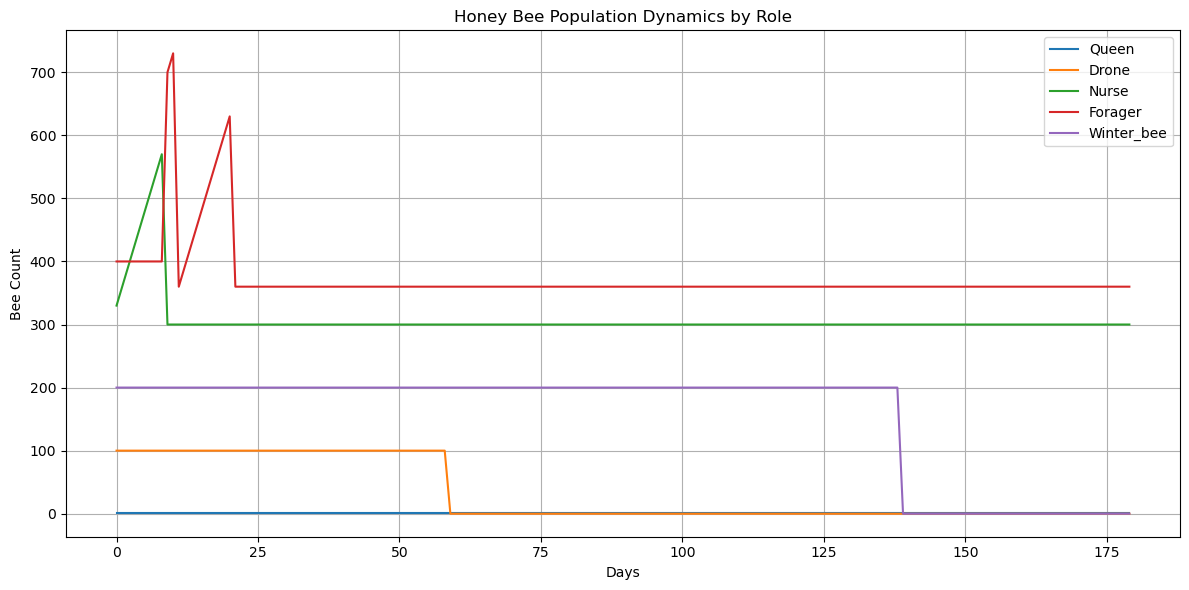

In [ ]:
# Define bee roles and characteristics
bee_roles = {
    "queen": {"lifespan": 1500, "count": 1, "fertility_rate": 1500},
    "drone": {"lifespan": 60, "initial": 100},
    "nurse": {"lifespan": 21, "initial": 300},
    "forager": {"lifespan": 12, "initial": 400},
    "winter_bee": {"lifespan": 140, "initial": 200}
}

# Initialize bee populations
bee_colony = {
    "queen": [0] * bee_roles["queen"]["count"],
    "drone": [0] * bee_roles["drone"]["initial"],
    "nurse": [0] * bee_roles["nurse"]["initial"],
    "forager": [0] * bee_roles["forager"]["initial"],
    "winter_bee": [0] * bee_roles["winter_bee"]["initial"]
}

# Define environmental factors
pesticide_stress = 0.02
disease_stress = 0.01
seasonal_death_spike = 0.05
food_stress = 0.03

# Simulate days
days = 180
population_history = {role: [] for role in bee_colony}

for day in range(days):
    # Simulate ageing and death
    for role in bee_colony:
        max_life = bee_roles[role]["lifespan"]
        stress_modifier = 1.0
        if role == "forager":
            stress_modifier += pesticide_stress + food_stress + disease_stress
        elif role == "nurse":
            stress_modifier += disease_stress
        elif role == "winter_bee" and 90 <= day <= 120:
            stress_modifier += seasonal_death_spike
        
        # Update aging and death
        bee_colony[role] = [age + 1 for age in bee_colony[role] if age + 1 < max_life / stress_modifier]
    
    # Reproduction (only queen lays eggs -> nurses grow from brood)
    if len(bee_colony["queen"]) > 0:
        new_nurses = int(bee_roles["queen"]["fertility_rate"] / 50)
        bee_colony["nurse"].extend([0] * new_nurses)

    # Role transitions
    graduating_nurses = [age for age in bee_colony["nurse"] if age >= 10]
    bee_colony["nurse"] = [age for age in bee_colony["nurse"] if age < 10]
    bee_colony["forager"].extend([0] * len(graduating_nurses))

    # Track population
    for role in bee_colony:
        population_history[role].append(len(bee_colony[role]))

# Plot population trends
plt.figure(figsize=(12, 6))
for role in population_history:
    plt.plot(population_history[role], label=role.capitalize())
plt.title("Honey Bee Population Dynamics by Role")
plt.xlabel("Days")
plt.ylabel("Bee Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
